We use this for binary classification problem. 
Given $x$, we want $\hat{y} = P(y = 1 | x)$

- x is a feature vector where $x \in \mathbb{R^{n_x}}$ and b is a bias term $b \in \mathbb{R}$
- One choice of modeling it will be to use a linear model: $\hat{y} = (w^T x + b)$ where $w \in \mathbb{R^{n_x}}$ 
  - The problem is ouput can range from $-\infty$ to $+\infty$ which is not what we want.
- Now consider the sigmoid function: $\sigma(z) = \frac{1}{1 + e^{-z}}$
  - This function maps any real number to the range (0, 1)
  - We can use this function to model $P(y = 1 | x)$ as  $\hat{y} = \sigma(w^T x + b)$

In [1]:
from manim import *

In [25]:
# %%manim -qm -v WARNING SquareToCircle

# class SquareToCircle(Scene):
#    def construct(self):
#       square = Square()
#       circle = Circle()
#       circle.set_fill(BLUE, opacity=0.5)
#       self.play(Create(square))
#       self.play(Transform(square, circle))
#       self.wait()



In [26]:
%%manim -qm -v WARNING LogisticLossSurface

class LogisticLossSurface(ThreeDScene):
    def construct(self):
        #self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)

        # Define axes
        # axes = ThreeDAxes(
        #     x_range=[-3, 3, 1],
        #     y_range=[-3, 3, 1],
        #     z_range=[0, 100, 0.5],
        #     x_length=7,
        #     y_length=7,
        #     z_length=4,
        # )
        axes = ThreeDAxes()
        self.add(axes)

        # Define logistic loss function
        def logistic_loss(x, y):
            z = 0.5 * x + 0.5 * y
            p = 1 / (1 + np.exp(-z))
            return -np.log(p)

        def parabolic_func(x, y):
            return 0.3 * x**2 + 0.5 * y**2


        # Create the surface plot
        surface = Surface(
            lambda u, v: axes.c2p(u, v, parabolic_func(u, v)),
            u_range=[-20, 20],
            v_range=[-20, 20],
            resolution=(50, 50),
            fill_opacity=0.75
        )
        surface.set_color_by_gradient(BLUE, GREEN)
        self.add(surface)

        # Add labels
        x_label = axes.get_x_axis_label(Tex("x"), edge=RIGHT, direction=RIGHT).scale(0.7)
        y_label = axes.get_y_axis_label(Tex("y"), edge=UP, direction=UP).scale(0.7)
        z_label = axes.get_z_axis_label(Tex("Loss"), edge=OUT, direction=OUT).scale(0.7)
        self.add(x_label, y_label, z_label)

        # # Add interactive rotation
        # self.begin_3dillusion_camera_rotation(rate=0.1)
        # self.wait(10)
        # self.stop_3dillusion_camera_rotation()
        self.set_camera_orientation(phi=75 * DEGREES, theta=50 * DEGREES)
        self.wait(2)

Manim Community v0.18.1

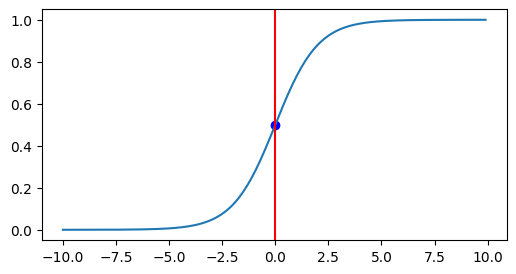

In [17]:
## Let us quickly check how the sigmoid function looks like
import matplotlib.pyplot as plt
import numpy as np
domain_def = np.arange(-10, 10, 0.1)
def sigmoid(x):
    return 1/(1+np.exp(-x))
range_def = sigmoid(domain_def)

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(6, 3))  # Adjust the height value as needed

plt.plot(domain_def, range_def)
## add a vertical line at x = 0
plt.axvline(x=0, color='r')
plt.scatter(0, 0.5, color='b')

::: {.callout-tip title="Notes"}
- if $z = w^T x + b$ is large and positive, then $\sigma(z) = 1$+
- if $z = w^T x + b$ is large and negative, then $\sigma(z) = 0$

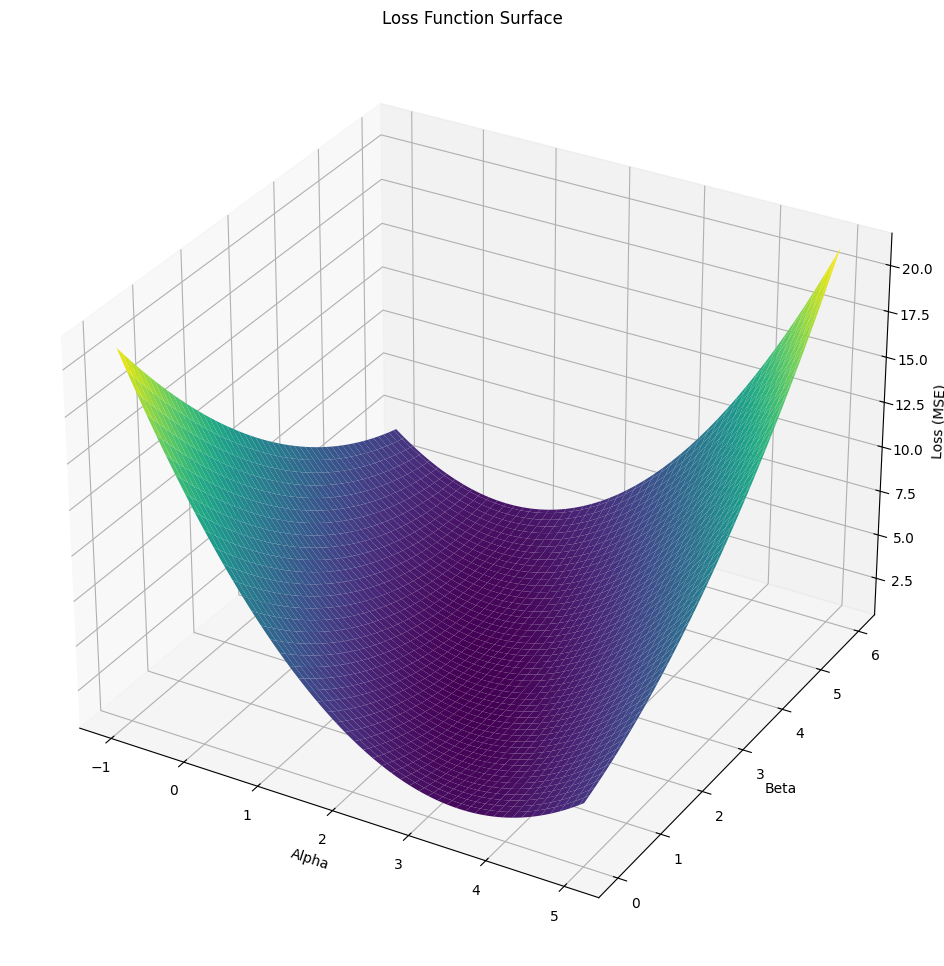

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate the Data
np.random.seed(42)
x = np.random.rand(100)
epsilon = np.random.randn(100)
y = 2 + 3 * x + epsilon

# Generate a grid of alpha and beta values
alpha_vals = np.linspace(-1, 5, 100)
beta_vals = np.linspace(0, 6, 100)
alpha_grid, beta_grid = np.meshgrid(alpha_vals, beta_vals)
loss_grid = np.zeros_like(alpha_grid)

# Calculate the loss for each combination of alpha and beta
for i in range(len(alpha_vals)):
    for j in range(len(beta_vals)):
        alpha_temp = alpha_vals[i]
        beta_temp = beta_vals[j]
        y_pred_temp = alpha_temp + beta_temp * x
        loss_grid[j, i] = np.mean((y - y_pred_temp) ** 2)

# Plot the loss function in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_grid, beta_grid, loss_grid, cmap='viridis')

ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Loss Function Surface')

plt.show()

In [27]:
np.random.rand(100)

array([0.7948113 , 0.50263709, 0.57690388, 0.49251769, 0.19524299,
       0.72245212, 0.28077236, 0.02431597, 0.6454723 , 0.17711068,
       0.94045858, 0.95392858, 0.91486439, 0.3701587 , 0.01545662,
       0.92831856, 0.42818415, 0.96665482, 0.96361998, 0.85300946,
       0.29444889, 0.38509773, 0.85113667, 0.31692201, 0.16949275,
       0.55680126, 0.93615477, 0.6960298 , 0.57006117, 0.09717649,
       0.61500723, 0.99005385, 0.14008402, 0.51832965, 0.87737307,
       0.74076862, 0.69701574, 0.70248408, 0.35949115, 0.29359184,
       0.80936116, 0.81011339, 0.86707232, 0.91324055, 0.5113424 ,
       0.50151629, 0.79829518, 0.64996393, 0.70196688, 0.79579267,
       0.89000534, 0.33799516, 0.37558295, 0.09398194, 0.57828014,
       0.03594227, 0.46559802, 0.54264463, 0.28654125, 0.59083326,
       0.03050025, 0.03734819, 0.82260056, 0.36019064, 0.12706051,
       0.52224326, 0.76999355, 0.21582103, 0.62289048, 0.08534746,
       0.05168172, 0.53135463, 0.54063512, 0.6374299 , 0.72609

In [29]:
x = np.random.rand(100)
1 / (1 + np.exp(-2 - 3 * x))

array([0.91901028, 0.98640724, 0.9792584 , 0.90915559, 0.9048505 ,
       0.98374406, 0.90187989, 0.98863268, 0.98399511, 0.90413575,
       0.90503912, 0.99303535, 0.95782399, 0.95738203, 0.98832312,
       0.99216855, 0.99302209, 0.98607621, 0.95806435, 0.90469384,
       0.98702205, 0.97528243, 0.9634791 , 0.99115539, 0.9116212 ,
       0.97005166, 0.88432713, 0.96789096, 0.89742265, 0.91344584,
       0.91313898, 0.98106508, 0.9857709 , 0.97702502, 0.99250888,
       0.95789662, 0.94568639, 0.99010516, 0.93528072, 0.99253226,
       0.88457266, 0.99267883, 0.89373561, 0.99074625, 0.97296204,
       0.99316537, 0.90215394, 0.97495123, 0.99266625, 0.97259637,
       0.97992884, 0.9834917 , 0.96654812, 0.97981995, 0.9770886 ,
       0.99101768, 0.8943853 , 0.94494997, 0.99224194, 0.99072203,
       0.96665617, 0.97937474, 0.94438829, 0.92853256, 0.96742508,
       0.95521472, 0.97704436, 0.90319186, 0.99277663, 0.99302645,
       0.98360882, 0.97361677, 0.94924144, 0.98835753, 0.98294